In [ ]:
import zipfile
import numpy as np
import pandas as pd
import os
from PIL import Image
from collections import defaultdict
import shutil
import matplotlib.pyplot as plt


# Data Loading

dataset penyakit daun jagung bersumber dari kaggle (https://www.kaggle.com/datasets/abdelrahmanemad2199/corn-or-maize-leaf-disease-dataset). untuk memudahkan data load, saya upload dataset ke google drive

In [ ]:
!gdown 1VHYXLnWOf1OMXFI0om3aaZy5uOIxBDE3


Downloading...
From (original): https://drive.google.com/uc?id=1VHYXLnWOf1OMXFI0om3aaZy5uOIxBDE3
From (redirected): https://drive.google.com/uc?id=1VHYXLnWOf1OMXFI0om3aaZy5uOIxBDE3&confirm=t&uuid=1112e052-49f1-45ca-9a9d-2a53e64760f6
To: /content/archive (40).zip
100% 171M/171M [00:04<00:00, 39.6MB/s]


#### extract file zip dataset

In [ ]:
# extract folder zip

with zipfile.ZipFile('/content/archive (40).zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


#### memeriksa jumlah kelas dalam dataset dan menampilkan resolusi gambar di dalam dataset

In [ ]:
# Fungsi untuk mengecek folder dan resolusi gambar
def check_folders_and_resolutions(directory):
    # Menyimpan nama folder, resolusi gambar, dan jumlah gambar di setiap folder
    folder_list = []
    image_resolutions = []
    folder_image_count = {}
    resolution_count = defaultdict(int)  # Menyimpan jumlah gambar berdasarkan resolusi

    # Menjelajah direktori utama dan subfolder
    for root, dirs, files in os.walk(directory):
        # Menyimpan subfolder di dalam folder_list
        for dir_name in dirs:
            folder_list.append(os.path.join(root, dir_name))  # Menambahkan path lengkap subfolder
            folder_image_count[os.path.join(root, dir_name)] = 0  # Inisialisasi jumlah gambar di folder

        # Mengecek file gambar di dalam folder (termasuk subfolder)
        for file_name in files:
            file_path = os.path.join(root, file_name)

            # Mengecek apakah file merupakan gambar
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                try:
                    with Image.open(file_path) as img:
                        # Dapatkan resolusi gambar
                        resolution = img.size  # Resolusi berupa tuple (lebar, tinggi)
                        image_resolutions.append((file_name, resolution))

                        # Update jumlah gambar di folder
                        folder_image_count[root] += 1

                        # Mengelompokkan resolusi dan menghitung jumlah gambar untuk masing-masing resolusi
                        resolution_count[resolution] += 1
                except Exception as e:
                    print(f"Error membuka {file_name}: {e}")

    # Menampilkan hasil folder yang ditemukan dan jumlah gambar di masing-masing folder
    print("Folder yang ditemukan di dalam direktori beserta jumlah gambar:")
    for folder in folder_list:
        print(f"- {folder}: {folder_image_count[folder]} gambar")

    # Menampilkan jumlah gambar berdasarkan resolusi
    print("\nJumlah gambar berdasarkan resolusi:")
    for resolution, count in resolution_count.items():
        print(f"- {resolution[0]}x{resolution[1]}: {count} gambar")

# Tentukan path folder yang ingin Anda cek
directory = '/content/dataset/corn/data'  # Gantilah dengan path folder Anda

# Panggil fungsi untuk mengecek folder dan resolusi gambar
check_folders_and_resolutions(directory)


Folder yang ditemukan di dalam direktori beserta jumlah gambar:
- /content/dataset/corn/data/Blight: 2743 gambar
- /content/dataset/corn/data/Healthy: 3476 gambar
- /content/dataset/corn/data/Common_Rust: 3576 gambar
- /content/dataset/corn/data/Gray_Leaf_Spot: 2565 gambar

Jumlah gambar berdasarkan resolusi:
- 256x256: 12360 gambar


#### menghapus dataset Common_rust, karena pada sistem ini hanya mengklasifikasikan daun jagung sehat, Blight (Hawar Daun), dan gray leaf spot (Kawat Daun)

In [ ]:
# drop common rust

# Path to the folder you want to delete
folder_path = '/content/dataset//corn/data/Common_Rust'

# Check if the folder exists before attempting to delete
if os.path.exists(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' deleted successfully.")
    except OSError as e:
        print(f"Error deleting folder '{folder_path}': {e}")
else:
    print(f"Folder '{folder_path}' not found.")


Folder '/content/dataset//corn/data/Common_Rust' deleted successfully.


#### menampilkan gambar masing-masing dataset daun jagung

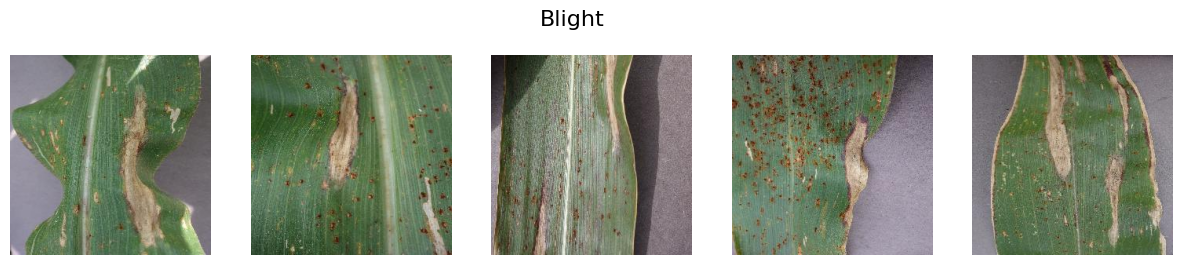

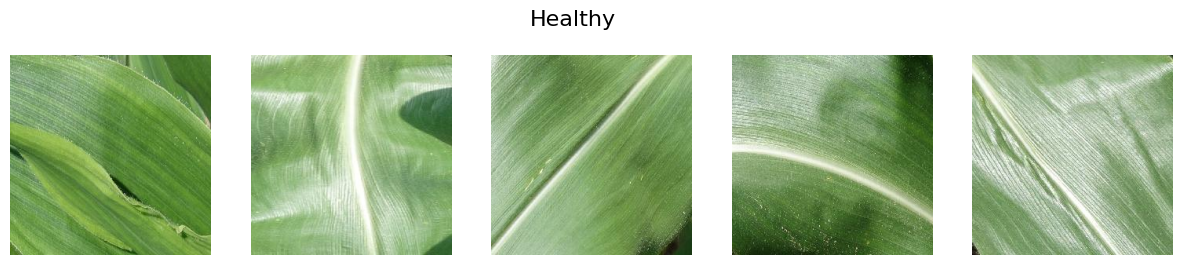

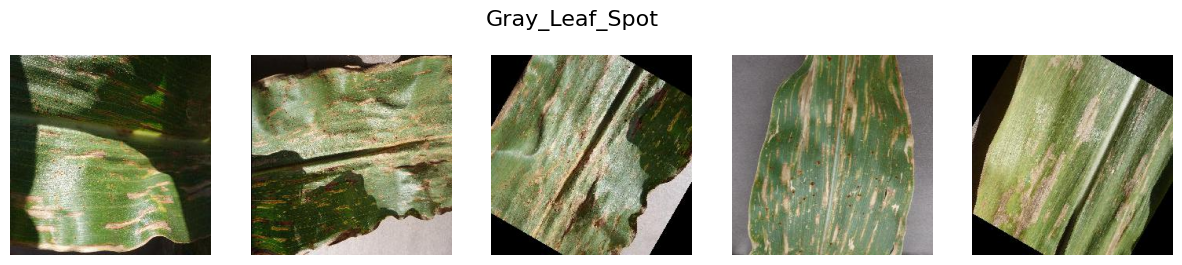

In [ ]:
# Path to the image directory
image_dir = '/content/dataset/corn/data'

# Get a list of subfolders (classes)
class_folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Iterate through each class folder
for class_folder in class_folders:
  class_path = os.path.join(image_dir, class_folder)
  images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

  # Display up to 5 images per class
  num_images_to_display = min(5, len(images))
  fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))
  fig.suptitle(class_folder, fontsize=16)

  for i in range(num_images_to_display):
      image_path = os.path.join(class_path, images[i])
      try:
          img = plt.imread(image_path)
          axes[i].imshow(img)
          axes[i].axis('off') # Hide axes
      except Exception as e:
          print(f"Error displaying image {image_path}: {e}")
          axes[i].axis('off')

  plt.show()


# Data Preprocesing